### Resonant

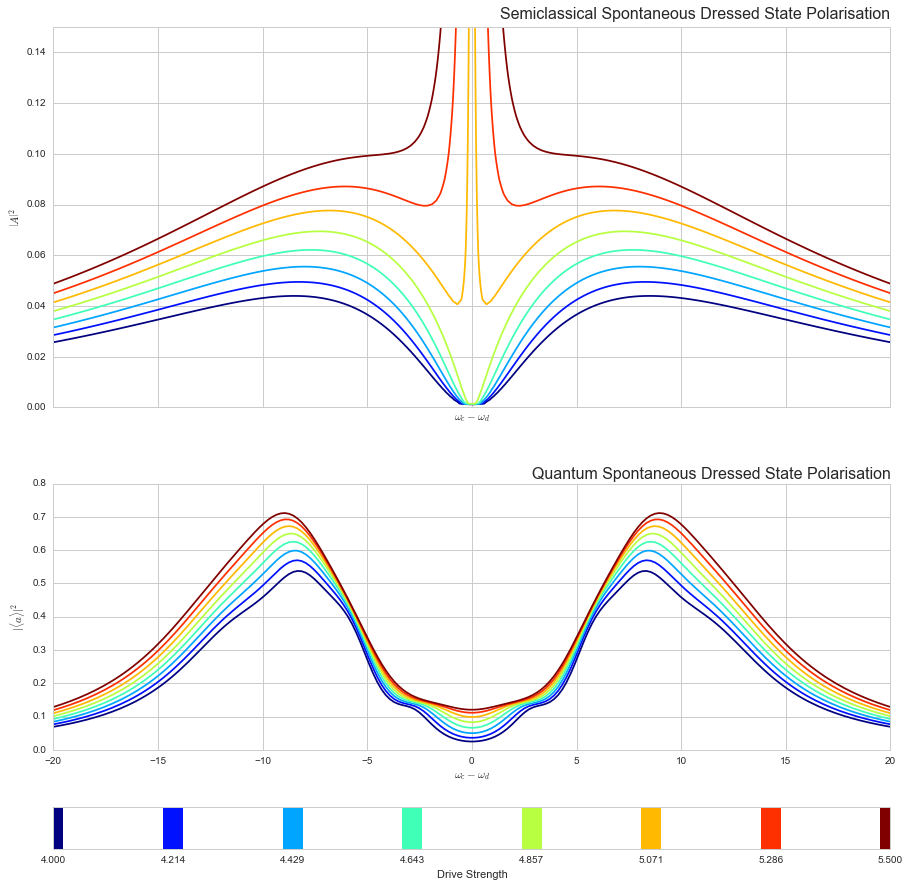

In [21]:
### Resonant

fig, ax = plt.subplots(2, 1, figsize=(15, 15), sharex=True)

q_res_drives = np.linspace(4, 5.5, 8)

## Semiclassical
res_alpha = np.linspace(0, 0.15, 100)
res_detrange = np.linspace(-20, 20, 200)
res_drives = np.array([[res_drive(a, det, kappa, g) for det in res_detrange] for a in res_alpha])

mble = ax[0].contour(res_detrange, res_alpha, res_drives, levels=q_res_drives, cmap='jet')
ax[0].set_title('Semiclassical Spontaneous Dressed State Polarisation', loc='right', 
                fontdict={'fontsize': 16, 'verticalalignment': 'bottom'})
ax[0].set_xlabel('$\omega_c-\omega_d$')
ax[0].set_ylabel('$\left|A\\right|^2$')
res_cbar = plt.colorbar(mble, ax=ax[1], 
                 label='Drive Strength',
                 orientation='horizontal')

# Puts chosen set of level lines on the colorbar
Mark_Colorbar = False
if Mark_Colorbar:
    cont = ax[0].contour(mble_disp, levels=[q_disp_drives_1, q_disp_drives_2], colors=['r', 'b'])
    res_cbar.add_lines(cont, erase=False)

# Wider colorbar lines
res_childs = res_cbar.ax.get_children()
res_childs[0].set_linewidths(20)

## Quantum 
q_res_detrange = res_detrange

carmichael_parameters = [qo.JaynesCummingsParameters(10, matrix_size).det_params(
                              drive_strengths=q_res_drive,
                              drive_cavity_detunings=q_res_detrange,
                              qubit_cavity_detunings=0,
                              c_op_params=[1, 1],
                              omega_cavity=10) for q_res_drive in q_res_drives]

carmichael_systems = [qo.SteadyStateJaynesCummingsModel(*c_params) for c_params in carmichael_parameters]

for sys in enumerate(carmichael_systems):
    ax[1].plot(q_res_detrange, sys[1].abs_cavity_field()**2, c=res_childs[0].get_colors()[sys[0]])
ax[1].set_title('Quantum Spontaneous Dressed State Polarisation', loc='right', fontdict={'fontsize': 16})
ax[1].set_xlabel('$\omega_c-\omega_d$')
ax[1].set_ylabel('$|\langle a \\rangle | ^2 $')

### Dispersive Regime

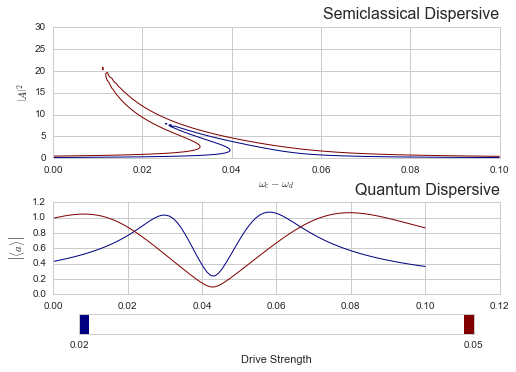

In [19]:
### Dispersive
## Semiclassical 

# Quantum drives (declared here to call for levels in semiclassical)
q_disp_drives = np.linspace(0.02, 0.05, 2)
disp_fig = plt.figure()

gs = gridspec.GridSpec(4, 3)
disp_ax = [None, None, None]
disp_ax[0] = disp_fig.add_subplot(gs[0:2, :])
disp_ax[1] = disp_fig.add_subplot(gs[2:4, :])
# disp_fig, disp_ax = plt.subplots(2, sharex=True, figsize=(15, 15))

disp_alphas = np.linspace(0, 30, 100)
disp_detrange = np.linspace(0, 0.1, 100)
disp_drives = np.array([[disp_drive(A, 
                  cavity_freq, 
                  cavity_freq+d, 
                  -1, 
                  c_q_det, 
                  coupling_strength, 
                  kappa_disp) for d in disp_detrange] for A in disp_alphas])

mble_disp = disp_ax[0].contour(disp_detrange, disp_alphas, disp_drives, 
                               levels=q_disp_drives, 
                               linewidths=1.0,
                               cmap='jet')
disp_ax[0].set_title('Semiclassical Dispersive', loc='right', 
                fontdict={'fontsize': 16, 'verticalalignment': 'bottom'})
disp_ax[0].set_xlabel('$\omega_c - \omega_d$')
disp_ax[0].set_ylabel('$\left|A\\right|^2$')
if len(q_disp_drives) > 1:
    disp_cbar = plt.colorbar(mble_disp, ax=disp_ax[1], 
                 label='Drive Strength', 
                 orientation='horizontal')
    # Puts chosen set of level lines on the colorbar
    Mark_Colorbar = False
    if Mark_Colorbar:
        cont = ax[0].contour(mble_disp, levels=[q_disp_drives_1, q_disp_drives_2], colors=['r', 'b'])
        cbar.add_lines(cont, erase=False)

    # Wider colorbar lines
    disp_childs = disp_cbar.ax.get_children()
    disp_childs[0].set_linewidths(20)

## Quantum
# set parameters for each q_disp_drive
q_disp_detrange = disp_detrange
bishop_parameters = [qo.JaynesCummingsParameters(coupling_strength, matrix_size).det_params(
                              drive_strengths=q_disp_drive, # should have xiC1 for dip @ 6.3 drive
                              drive_cavity_detunings=q_disp_detrange, # Should have * chi0 for dip @ 6.3 drive
                              qubit_cavity_detunings=c_q_det,
                              c_op_params=[kappa_disp],
                              omega_cavity=cavity_freq) for q_disp_drive in q_disp_drives]

# Build system for each q_disp_drive
bishop_systems = [qo.SteadyStateJaynesCummingsModel(*b_params) for b_params in bishop_parameters]

# Plot all absolute cavity fields with colors from semiclassical contours
for sys in enumerate(bishop_systems):
    disp_ax[1].plot(q_disp_detrange, sys[1].abs_cavity_field(), linewidth=1.0, c=disp_childs[0].get_colors()[sys[0]])

# disp_ax[1].plot(q_disp_detrange, abs_cavity_field_Q(bishop_system)**2, linewidth=1.0)
disp_ax[1].set_title('Quantum Dispersive', loc='right', fontdict={'fontsize': 16, 'verticalalignment': 'bottom'})
disp_ax[1].set_xlabel('$\omega_c - \omega_d$')
disp_ax[1].set_ylabel('$\left | \langle a \\rangle \\right|$')
gs.update(wspace=0.5, hspace=1)

### Critical Slowing

In [50]:
t_params = np.linspace(0, 8, 300), None
drive_1 = 20
det_1 = 0
drive_2 = 5
det_2 = 0
carmichael_parameters_1 = qo.JaynesCummingsParameters(10, matrix_size).det_params(
                              drive_strengths=drive_1,
                              drive_cavity_detunings=det_1,
                              qubit_cavity_detunings=0,
                              c_op_params=[1, 1],
                              omega_cavity=10)
carmichael_parameters_2 = qo.JaynesCummingsParameters(10, matrix_size).det_params(
                              drive_strengths=drive_2,
                              drive_cavity_detunings=det_2,
                              qubit_cavity_detunings=0,
                              c_op_params=[1, 1],
                              omega_cavity=10)
td_carmichael_system_1 = qo.TimeDependentJaynesCummingsModel(*carmichael_parameters_1, *t_params)
td_carmichael_system_2 = qo.TimeDependentJaynesCummingsModel(*carmichael_parameters_2, *t_params)

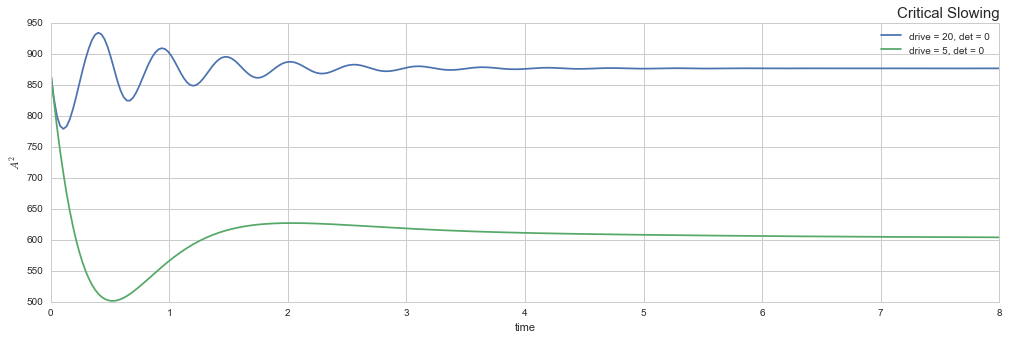

In [19]:
N = td_carmichael_system_1.a.dag()*td_carmichael_system_1.a
y_1 = td_carmichael_system_1.mesolve([N])
y_2 = td_carmichael_system_2.mesolve([N])
plt.plot(t_params[0], y_1.expect[0])
plt.plot(t_params[0], y_2.expect[0])
plt.legend(['drive = {}, det = {}'.format(drive_1, det_1), 'drive = {}, det = {}'.format(drive_2, det_2)])
plt.xlabel('time')
plt.ylabel('$A^2$')
plt.title('Critical Slowing', loc='right', fontdict={'fontsize': 15})

### Monte Carlo

100.0%. Run time:   0.03s. Est. time left: 00:00:00:00
Total run time:   0.12s


(-2.5707963267948966, 2.5707963267948966)

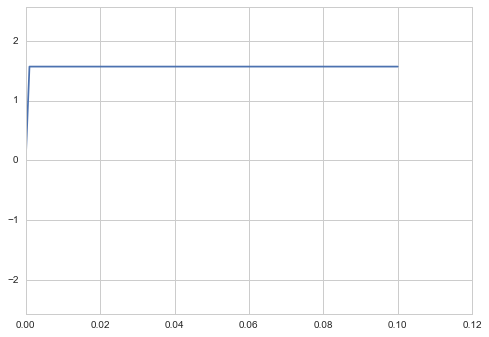

In [40]:
mc_drive = 0.5
mc_det = 0
t_params = np.linspace(0, 0.1, 100), None

mc_sys_params = qo.JaynesCummingsParameters(10, matrix_size).det_params(
                              drive_strengths=mc_drive,
                              drive_cavity_detunings=mc_det,
                              qubit_cavity_detunings=0,
                              c_op_params=[1, 1],
                              omega_cavity=10)

mc_sys = qo.TimeDependentJaynesCummingsModel(*mc_sys_params, *t_params)

exps = [mc_sys.a.dag()]
n_runs = 1
solved = [mc_sys.mcsolve(ntrajs=1, exps=exps) for _ in range(n_runs)]

## Picks the Pi/2 phase 100%  of the time? - always 100% imaginary?
for sol in solved:
    res = sol.expect[0]
    plt.plot(mc_sys.tlist, np.angle([re for re in res]))

plt.ylim(-np.pi/2-1, np.pi/2+1)

### Leaf?

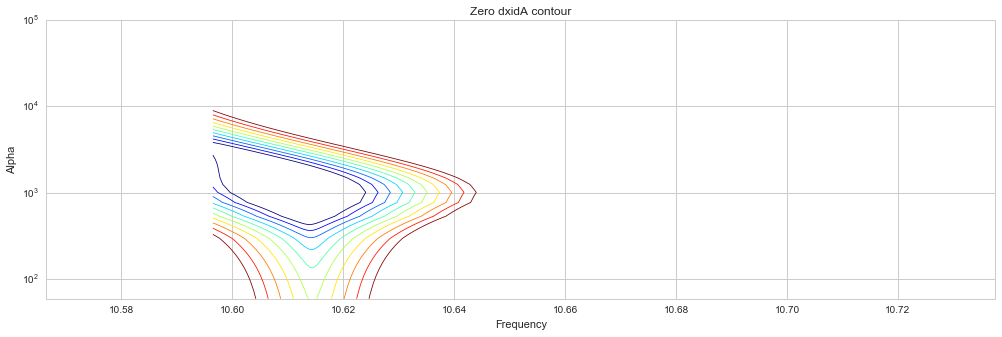

In [465]:
def dxidA(A, drive_freq):
    return np.sqrt(((cavity_freq-sigmaz*coupling_strength**2/np.sqrt(coupling_strength**2*(sigmaz+A**2)*2+c_q_det**2))**2-drive_freq**2)**2+drive_freq**2*kappa_disp**2)/cavity_freq+(A**2*sigmaz*coupling_strength**4*(cavity_freq-sigmaz*coupling_strength**2/np.sqrt(coupling_strength**2 *(sigmaz+A**2)*2+c_q_det**2))/np.sqrt(((cavity_freq-sigmaz*coupling_strength**2/np.sqrt(coupling_strength**2*(sigmaz+A**2)*2+c_q_det**2))**2-cavity_freq**2)**2+(cavity_freq**2) *kappa_disp**2)/(coupling_strength**2*((sigmaz+A**2)*2.0+c_q_det**2)**(3.0/2.0))*((cavity_freq-sigmaz*coupling_strength**2/np.sqrt(coupling_strength**2*(sigmaz+A**2)*2.0+c_q_det**2))**2-cavity_freq**2)*4.0)/cavity_freq

diff_alphas = np.linspace(0.1, 100, 250)
diff_freqs = cavity_freq+(30*q_disp_detrange*chi0+0.03)
diff_drive_diffs = np.array([[dxidA(alpha, freq) for alpha in diff_alphas] for freq in diff_freqs])
plt.contour(diff_freqs, diff_alphas/xiC1, diff_drive_diffs.T, levels=np.linspace(-0.02, 0.02, 10), linewidths=0.8, figsize=(15, 5), cmap='jet')
plt.xlabel('Frequency')
plt.ylabel('Alpha')
plt.yscale('log')
plt.title('Zero dxidA contour')
plt.vlines(cavity_freq, 0, 100000)

### Analytic Duffing Wigner Function
http://iopscience.iop.org/article/10.1088/1464-4266/1/2/005/pdf

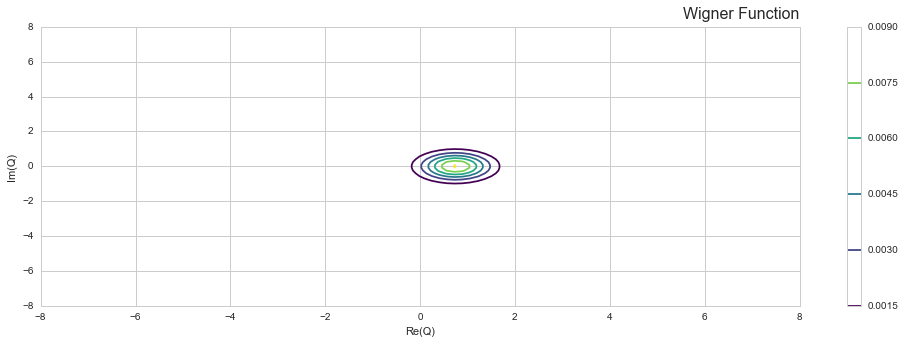

In [456]:
eps = 12
x = np.linspace(-8, 8, 100)
y = np.linspace(-8, 8, 100)

def W(alpha, lamb):
    return np.exp(
        -2*np.absolute(alpha)**2) * (
        np.absolute(jv(lamb-1, np.sqrt(-8 * eps * np.conj(alpha)))/
        np.conj(alpha)**((lamb-1)/2)))**2 

w = np.array([[W(x+y*1j, 15) for x in x] for y in y])

plt.contour(x, y, np.real(w))
plt.colorbar()
plt.title('Wigner Function', loc='right', fontdict={'fontsize': 16, 'verticalalignment': 'bottom'})
plt.xlabel('Re(Q)')
plt.ylabel('Im(Q)')

## Setup

In [3]:
%matplotlib inline

import matplotlib.pyplot as plt
from matplotlib import gridspec
import seaborn as sb
sb.set(style='whitegrid', context='notebook', rc={'image.cmap': 'viridis'})
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = 17, 5

import numpy as np
import qutip as qt
from scipy.special import jv
import scipy.integrate as integr

import time

import importlib
import quantumoptics as qo
qo = importlib.reload(qo)

### Parameters
matrix_size = 5

# Dispersive
c_q_det = (8.1831-10.5665)
kappa_disp = 0.0024
gamma = 0
coupling_strength = 0.3347
cavity_freq = 10.5665
sigmaz=-1

# Normalising Parameters
xiC1= (abs(c_q_det)*kappa_disp)**(3/2)/(3**(3/4)*coupling_strength**2)
chi0=coupling_strength**2/abs(c_q_det)

def disp_drive(A, omega_cavity, omega_drive, sigmaz, det, g, kappa):
  '''self-consistently determine xi from A'''
  def chi(A):
    return sigmaz*(g**2)/np.sqrt(2*g**2*(A**2+sigmaz)+det**2)
  return np.sqrt(A**2 * (1/omega_cavity**2)*(
            (omega_drive**2-(omega_cavity-chi(A))**2)**2 + kappa_disp**2*omega_drive**2))

# Resonant
kappa=1
g=10

def res_drive(alphasq, detuning, kappa, g):
    return abs(-1j*np.sqrt(alphasq)*(
            kappa - 1j*(detuning + (detuning/abs(detuning))*g**2/np.sqrt(detuning**2 + 4 * g**2 * alphasq))))


# Q Function Method
def abs_cavity_field_Q(sys, xvec=np.linspace(-5, 5, 50), yvec=np.linspace(-5, 5, 50)):
    Qs = sys.qps(xvec, yvec)
    return np.array([abs(np.sum(xvec.T.dot(Q))+1j*np.sum(Q.dot(yvec))) for Q in Qs])/34


/Users/fergusbarratt/.pyenv/versions/3.5.0/lib/python3.5/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [22]:
c=res_childs[0].get_colors()[1]

In [23]:
c

array([ 0.        ,  0.06470588,  1.        ,  1.        ])

In [25]:
from matplotlib.colors import ColorConverter

In [26]:
ColorConverter.to_rgb(c)

TypeError: to_rgb() missing 1 required positional argument: 'arg'